## Predicting Profitability: A Comparative Analysis of Machine Learning Models

### Overview:

This project aims to predict the profitability of products based on historical sales data.The dataset was derived from two sources:Product data (CSV) and revenue data(Excel).
By merging these datasets,we can extract relevant features and create a target variable,"Profit"

* Features contained in Product data(CSV):
1. Product ID
2. Item Type
3. Item Group

* Features contained in Revenue data (Excel):
1. Customer ID
2. Date
3. Sales Channel
4. Order Priority
5. Units Sold
6. Unit Price
7. Unit Cost(Local Currency)
8. Revenue
9. Unamed 9
10. Unamed 10

#### Methodology

##### Data Accquisition and  Preprocessing:
1. Data Extraction:
* Extract product from CSV file
* Extract revenue data from Excel file

2. Data Cleaning:
* Handle missing values ( e.g., imputation, deletion etc.)
* Identify and addres outliers
* Convert data types as needed (e.g., date, categorical)

3. Data Merging:
* Merge the two datasets based on the "Product ID" to create a unified dataset.

4. Feature Engineering:
* Create new features from existing ones(e.g., time-based features, categorical encodings)
* select releveant features for model training.

##### Model Development and Evaluation:
1. Model Selection:
* Explore various regression models including:
* Linear Regression
* Random Forest Regression
* Ridge 
* Decision Tree Regression
* Gradient Boosting Regression

2. Model Training:
* Split the data into training and testing sets
* Train each model on training set

3. Model Evaluation:
* Evaluate the performance of each model on the testing set using metrics like:
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)
* Mean Absolute Error (MAE)
* R-squared

4. Model Selection:
* Choose the model with the best performance based on the evaluation metrics

#### Tools and Technologies:
* Python
* Pandas
* Numpy
* Matplotlib
* Seaborn
* Scikit-learn

##### Load Libraries

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as pt
import seaborn as sns
import openpyxl

##### Data Extraction:

In [265]:
df1=pd.read_csv("C:/Users/DELL/Desktop/ML DATASET & PYTHON WORKS/product.csv")

df1

,Product ID,Item Type,Item Group
0,1,Cereal,Food
1,2,Meat,Food
2,3,Vegetables,Food
3,4,Office Supplies,Others
4,5,Personal Care,Others
5,6,Cosmetics,Others
6,7,Baby Food,Food
7,8,Beverages,Food
8,9,Snacks,Food
9,10,Clothes,Others


In [266]:
df2= pd.read_excel("C:/Users/DELL/Desktop/ML DATASET & PYTHON WORKS/Revenue.xlsx")
df2.head(5)

,Customer ID,Date,Product ID,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost(Local Curency),Revenue,Unnamed: 9,Unnamed: 10
0,1,2018-09-13,6,Online,Medium,1975,205.70,117.11,NaN,NaN,NaN
1,2,2018-08-27,1,Online,High,2542,421.89,364.69,NaN,NaN,NaN
2,3,2018-04-05,8,Online,C,5084,154.06,90.93,NaN,NaN,NaN
3,4,2018-11-19,5,Online,Low,9855,154.06,90.93,NaN,NaN,NaN
4,5,2018-11-13,2,Online,Low,2831,651.21,524.96,NaN,NaN,NaN


* Descriptive Analysis

In [267]:
df1.columns

Index(['Product ID', 'Item Type', 'Item Group'], dtype='object')

In [268]:
df1['Product ID'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [269]:
df1['Item Type'].unique()

array(['Cereal', 'Meat', 'Vegetables', 'Office Supplies', 'Personal Care',
       'Cosmetics', 'Baby Food', 'Beverages', 'Snacks', 'Clothes',
       'Fruits', 'Household'], dtype=object)

In [270]:
df1['Item Group'].unique()

array(['Food', 'Others'], dtype=object)

* Data Preprocessing

In [271]:
df2.columns

Index(['Customer ID', 'Date', 'Product ID', 'Sales Channel', 'Order Priority',
       'Units Sold', 'Unit Price', 'Unit Cost(Local Curency)', 'Revenue',
       'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

In [272]:
df2.drop(columns=[ 'Unnamed: 9','Unnamed: 10'],axis=1,inplace=True)

In [273]:
df2['Order Priority']= df2['Order Priority'].str.replace('C','Contextual Priority')

In [274]:
df2.head(5)

,Customer ID,Date,Product ID,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost(Local Curency),Revenue
0,1,2018-09-13,6,Online,Medium,1975,205.70,117.11,NaN
1,2,2018-08-27,1,Online,High,2542,421.89,364.69,NaN
2,3,2018-04-05,8,Online,Contextual Priority,5084,154.06,90.93,NaN
3,4,2018-11-19,5,Online,Low,9855,154.06,90.93,NaN
4,5,2018-11-13,2,Online,Low,2831,651.21,524.96,NaN


In [275]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Customer ID               50000 non-null  int64         
 1   Date                      50000 non-null  datetime64[ns]
 2   Product ID                50000 non-null  int64         
 3   Sales Channel             50000 non-null  object        
 4   Order Priority            50000 non-null  object        
 5   Units Sold                50000 non-null  int64         
 6   Unit Price                50000 non-null  float64       
 7   Unit Cost(Local Curency)  50000 non-null  float64       
 8   Revenue                   0 non-null      float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 3.4+ MB


In [276]:
df2['Sales Channel'].unique()

array(['Online', 'Offline'], dtype=object)

In [277]:
df2['Order Priority'].unique()

array(['Medium', 'High', 'Contextual Priority', 'Low'], dtype=object)

In [278]:
df2.isna().sum()

Customer ID                     0
Date                            0
Product ID                      0
Sales Channel                   0
Order Priority                  0
Units Sold                      0
Unit Price                      0
Unit Cost(Local Curency)        0
Revenue                     50000
dtype: int64

In [279]:
df2.shape

(50000, 9)

In [280]:
df2.isnull().sum()

Customer ID                     0
Date                            0
Product ID                      0
Sales Channel                   0
Order Priority                  0
Units Sold                      0
Unit Price                      0
Unit Cost(Local Curency)        0
Revenue                     50000
dtype: int64

In [281]:
df2.nunique()

Customer ID                 4000
Date                        3829
Product ID                    12
Sales Channel                  2
Order Priority                 4
Units Sold                  9943
Unit Price                    12
Unit Cost(Local Curency)      12
Revenue                        0
dtype: int64

In [282]:
df2.duplicated().sum()

0

* Data Enrichment

In [283]:
df2['Revenue']= df2['Unit Price']* df2['Units Sold']
df2['Expenses']= df2['Unit Cost(Local Curency)']* df2['Units Sold']
df2['Profit']= df2['Revenue']- df2['Expenses']
df2['Month']= df2['Date'].dt.strftime('%B')
df2['Year']= df2['Date'].dt.year
df2.head(5)

,Customer ID,Date,Product ID,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost(Local Curency),Revenue,Expenses,Profit,Month,Year
0,1,2018-09-13,6,Online,Medium,1975,205.70,117.11,406257.50,231292.25,174965.25,September,2018
1,2,2018-08-27,1,Online,High,2542,421.89,364.69,1072444.38,927041.98,145402.40,August,2018
2,3,2018-04-05,8,Online,Contextual Priority,5084,154.06,90.93,783241.04,462288.12,320952.92,April,2018
3,4,2018-11-19,5,Online,Low,9855,154.06,90.93,1518261.30,896115.15,622146.15,November,2018
4,5,2018-11-13,2,Online,Low,2831,651.21,524.96,1843575.51,1486161.76,357413.75,November,2018


* Data Merging

In [284]:
transaction= df2.merge(df1,on='Product ID',how='left')
transaction.head(5)

,Customer ID,Date,Product ID,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost(Local Curency),Revenue,Expenses,Profit,Month,Year,Item Type,Item Group
0,1,2018-09-13,6,Online,Medium,1975,205.70,117.11,406257.50,231292.25,174965.25,September,2018,Cosmetics,Others
1,2,2018-08-27,1,Online,High,2542,421.89,364.69,1072444.38,927041.98,145402.40,August,2018,Cereal,Food
2,3,2018-04-05,8,Online,Contextual Priority,5084,154.06,90.93,783241.04,462288.12,320952.92,April,2018,Beverages,Food
3,4,2018-11-19,5,Online,Low,9855,154.06,90.93,1518261.30,896115.15,622146.15,November,2018,Personal Care,Others
4,5,2018-11-13,2,Online,Low,2831,651.21,524.96,1843575.51,1486161.76,357413.75,November,2018,Meat,Food


In [285]:
transaction.shape

(50000, 15)

In [286]:
transaction.columns

Index(['Customer ID', 'Date', 'Product ID', 'Sales Channel', 'Order Priority',
       'Units Sold', 'Unit Price', 'Unit Cost(Local Curency)', 'Revenue',
       'Expenses', 'Profit', 'Month', 'Year', 'Item Type', 'Item Group'],
      dtype='object')

In [287]:
transaction['Year'].unique()

array([2018, 2010, 2019, 2011, 2020, 2012, 2013, 2014, 2015, 2016, 2017])

In [288]:
transaction.describe()

,Customer ID,Date,Product ID,Units Sold,Unit Price,Unit Cost(Local Curency),Revenue,Expenses,Profit,Year
count,50000.000000,50000,50000.000000,50000.00000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000
mean,1996.874280,2015-01-19 09:47:43.296000,6.505000,4999.61898,265.651350,187.322482,1.323716e+06,9.331574e+05,3.905587e+05,2014.572380
min,1.000000,2010-01-05 00:00:00,1.000000,1.00000,9.330000,6.920000,2.799000e+01,2.076000e+01,7.230000e+00,2010.000000
25%,993.000000,2013-01-31 00:00:00,3.000000,2498.00000,81.730000,35.840000,2.764871e+05,1.606370e+05,9.415092e+04,2013.000000
50%,1994.000000,2014-12-28 00:00:00,7.000000,5017.50000,154.060000,97.440000,7.813247e+05,4.671040e+05,2.795364e+05,2014.000000
75%,3005.000000,2016-11-24 06:00:00,10.000000,7493.25000,421.890000,263.330000,1.808642e+06,1.190390e+06,5.642867e+05,2016.000000
max,4000.000000,2020-12-31 00:00:00,12.000000,10000.00000,668.270000,524.960000,6.682032e+06,5.249075e+06,1.738178e+06,2020.000000
std,1157.178084,NaN,3.464467,2884.33508,216.916752,175.580570,1.463891e+06,1.145548e+06,3.777588e+05,2.620011


#### Exploratory Data Analysis

In [289]:
transaction['Item Group'].value_counts()

Item Group
Food      29291
Others    20709
Name: count, dtype: int64

In [290]:
transaction['Item Type'].value_counts()

Item Type
Cereal             4287
Fruits             4248
Beverages          4193
Household          4181
Clothes            4179
Personal Care      4161
Vegetables         4161
Snacks             4140
Baby Food          4133
Meat               4129
Cosmetics          4120
Office Supplies    4068
Name: count, dtype: int64

* Deriving Maximum Profit, Maximum Revenue,Maximum Expenses

In [291]:
print("Maximum Profit:" + str(transaction['Profit'].max()))
print("Maximum Revenue:" + str(transaction['Revenue'].max()))
print("Maximum Expenses:" + str(transaction['Expenses'].max()))


Maximum Profit:1738178.3899999997
Maximum Revenue:6682031.7299999995
Maximum Expenses:5249075.04


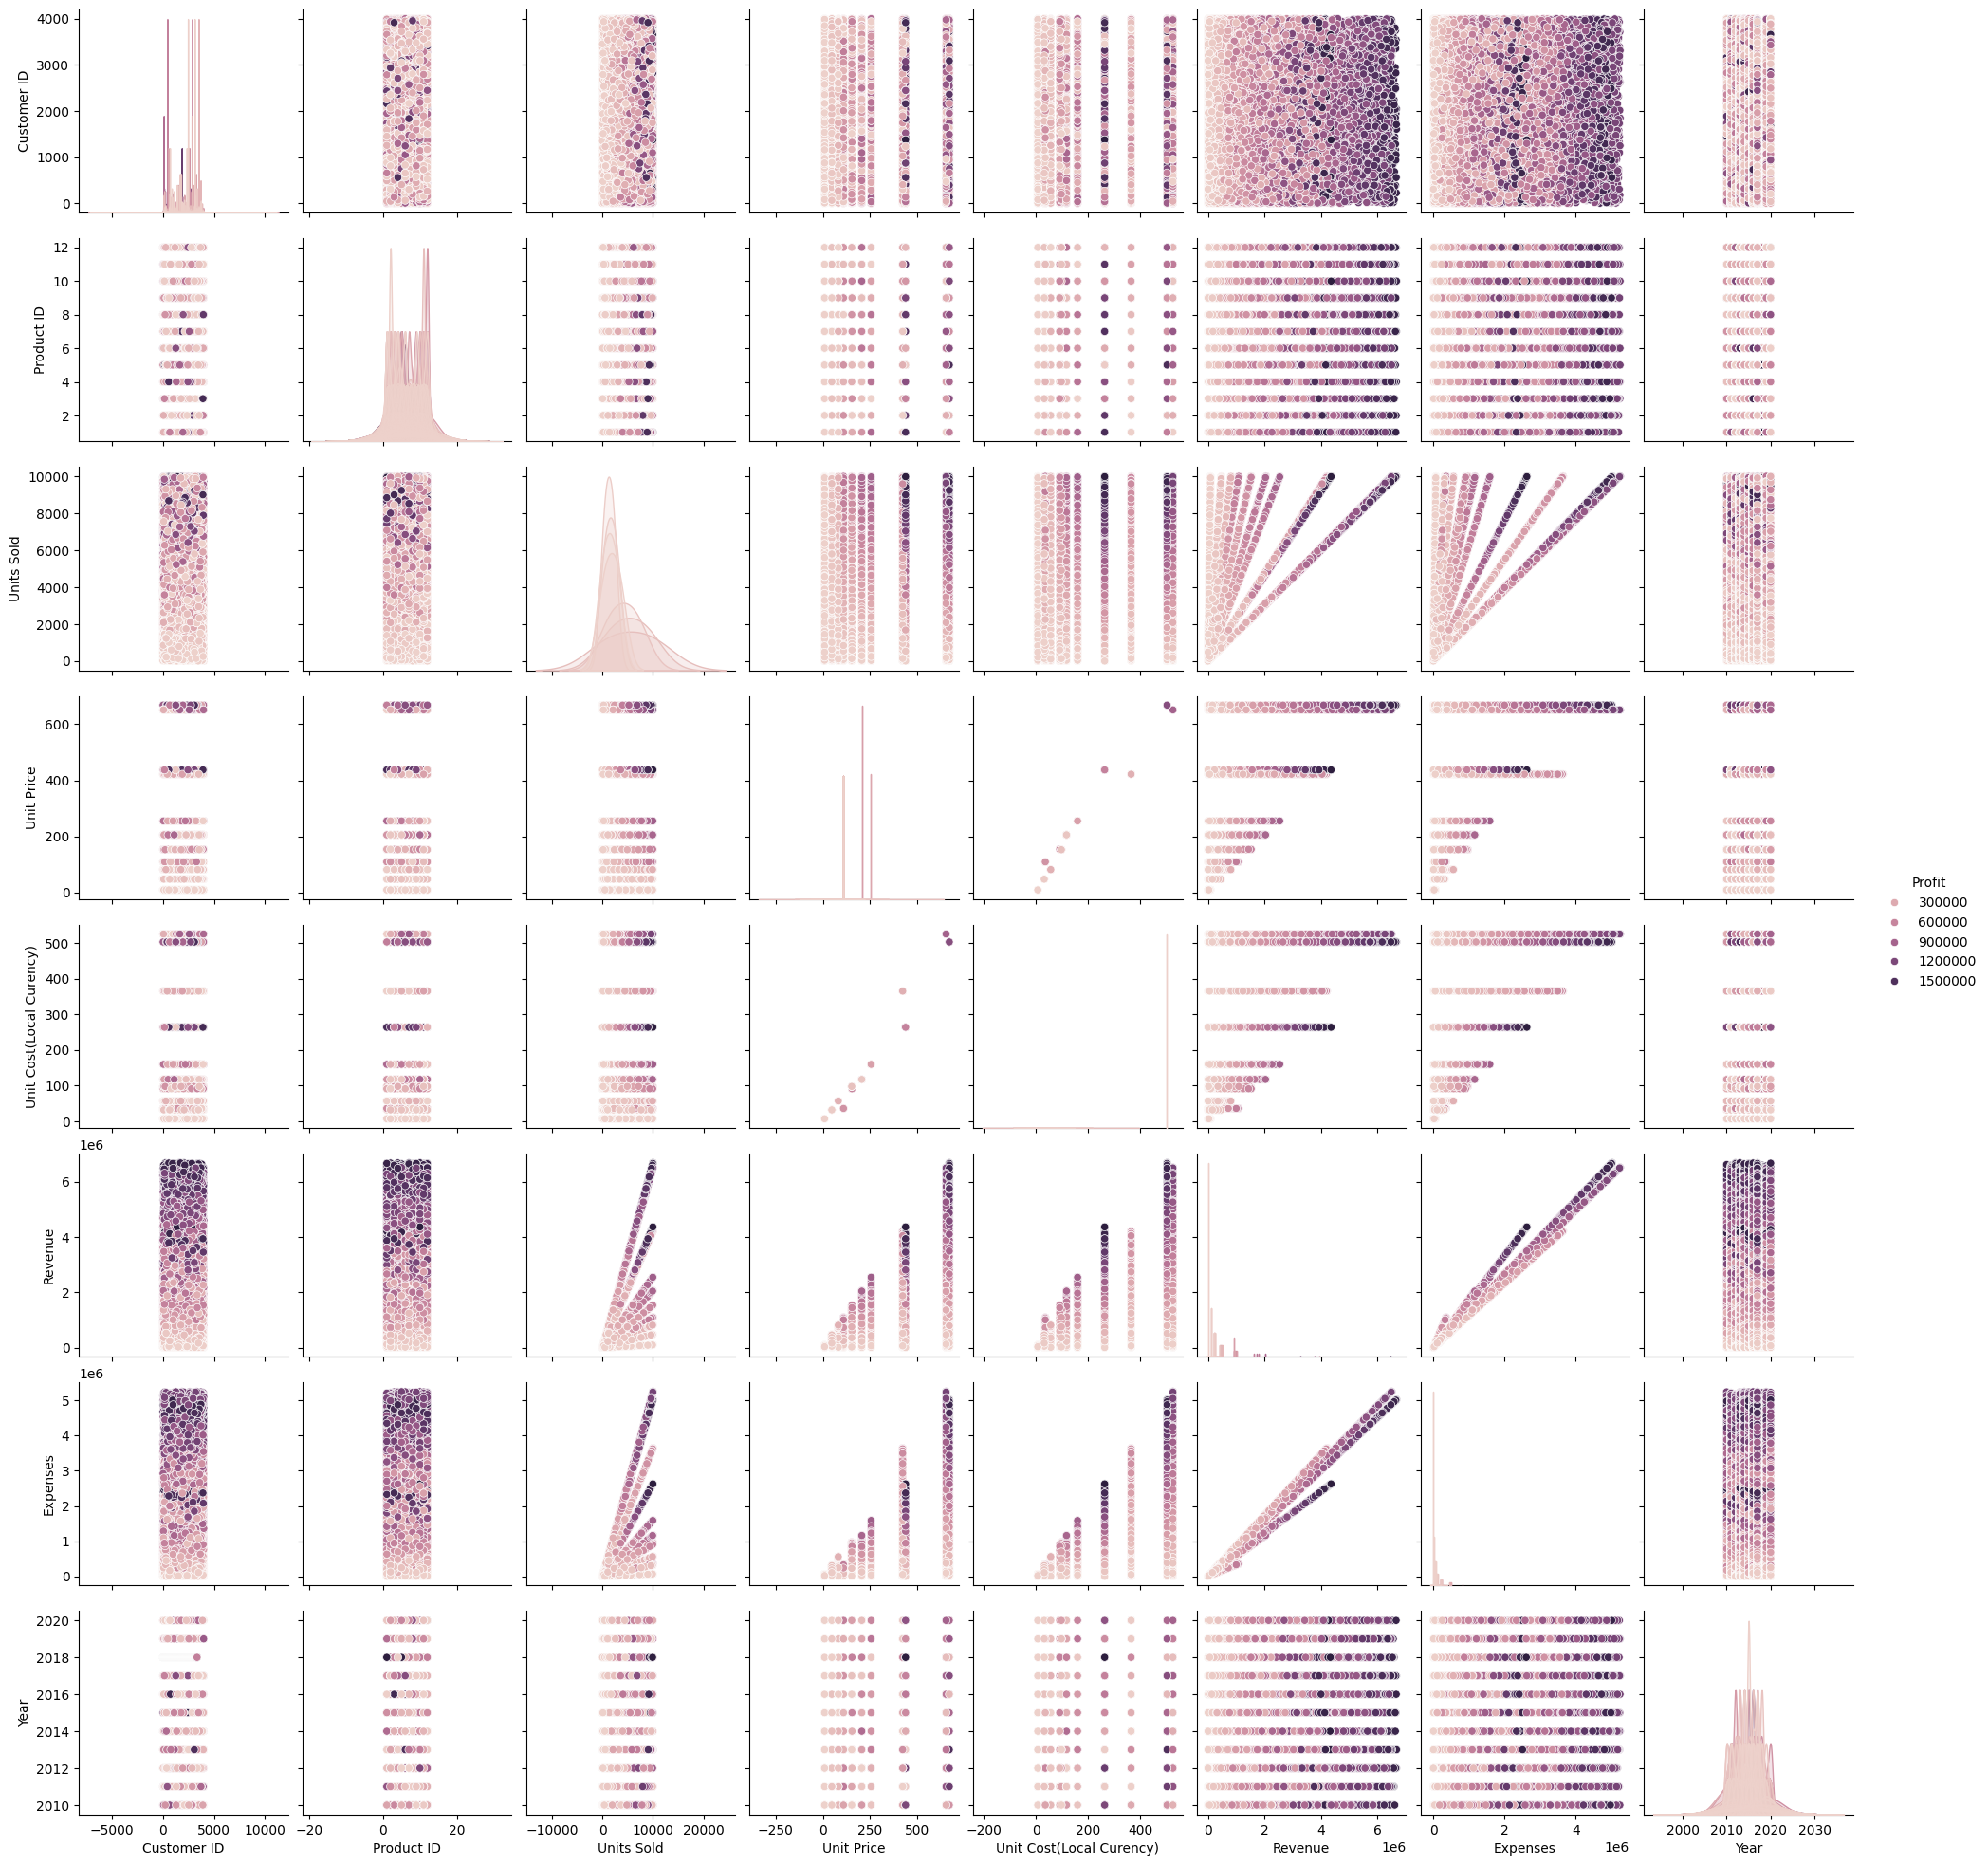

In [292]:
sns.pairplot(transaction,hue='Profit')

* Product Revenue distribution

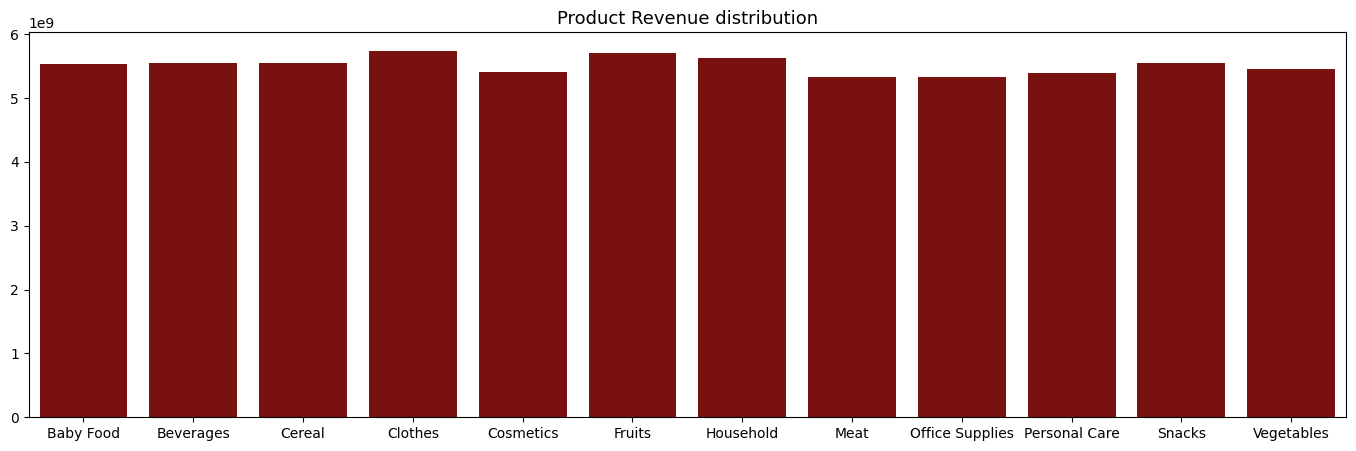

In [293]:
product_revenue= transaction.groupby('Item Type')['Revenue'].sum().reset_index()
plt.figure(figsize=(17,5))
sns.barplot(x='Item Type',y='Revenue',
            data=product_revenue,color='#8B0000')
plt.title('Product Revenue distribution',fontsize=13)
plt.xlabel("")
plt.ylabel("")
plt.show()

* Item Group Revenue distribution

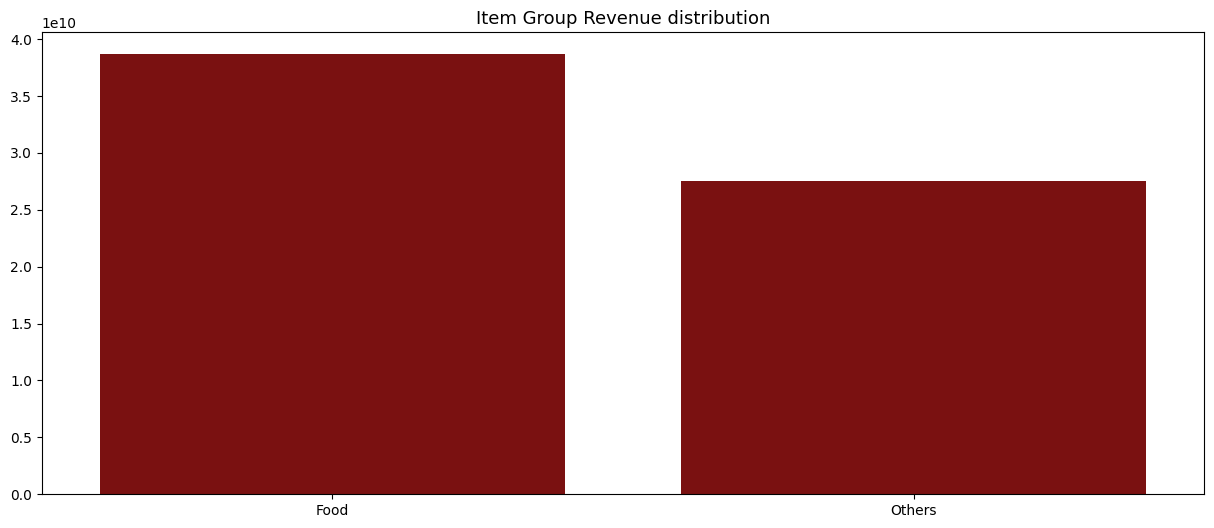

In [294]:
product_group_revenue= transaction.groupby('Item Group')['Revenue'].sum().reset_index()
plt.figure(figsize=(15,6))
sns.barplot(x='Item Group',y='Revenue',
            data=product_group_revenue,color='#8B0000')
plt.title('Item Group Revenue distribution',fontsize=13)
plt.xlabel("")
plt.ylabel("")
plt.show()

* Revenue Trend

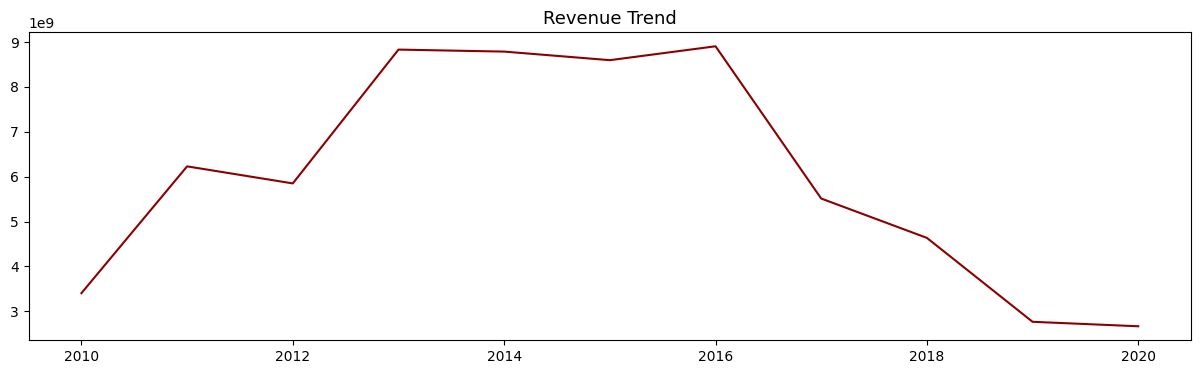

In [295]:
revenue_trend= transaction.groupby('Year')['Revenue'].sum().reset_index()
plt.figure(figsize=(15,4))
sns.lineplot(x='Year',y='Revenue',data=revenue_trend,color='#8B0000')
plt.title("Revenue Trend",fontsize=13)
plt.xlabel("")
plt.ylabel("")  
plt.show()

* Profit Trend

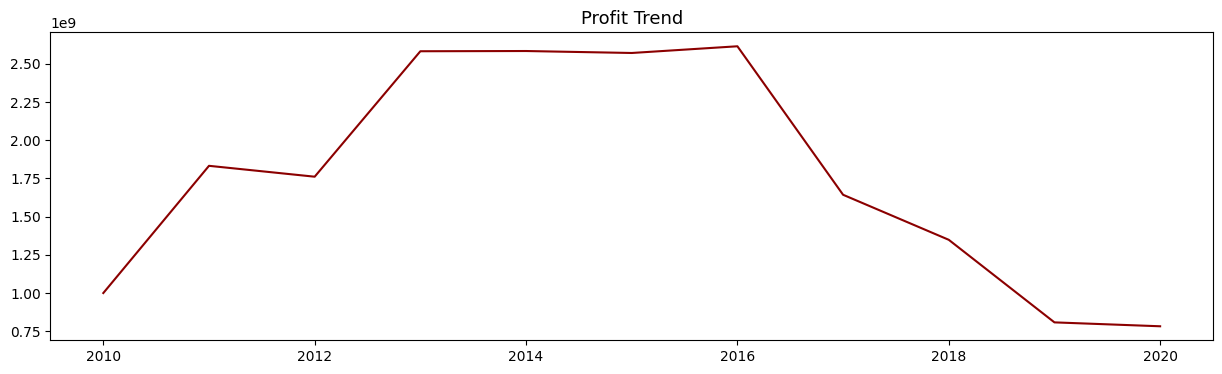

In [296]:
profit_trend= transaction.groupby('Year')['Profit'].sum().reset_index()
plt.figure(figsize=(15,4))
sns.lineplot(x='Year',y='Profit',data=profit_trend,color='#8B0000')
plt.title("Profit Trend",fontsize=13)
plt.xlabel("")
plt.ylabel("")  
plt.show()

* Opex Trend

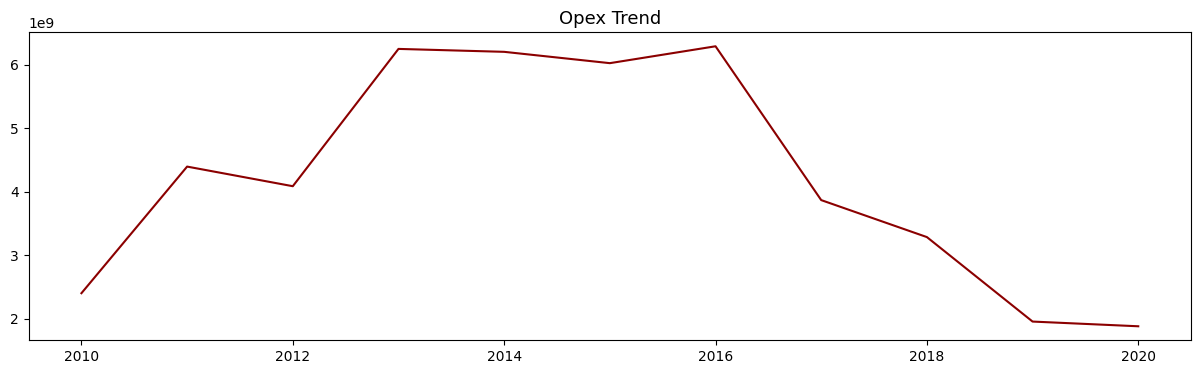

In [297]:
opex_trend= transaction.groupby('Year')['Expenses'].sum().reset_index()
plt.figure(figsize=(15,4))
sns.lineplot(x='Year',y='Expenses',data=opex_trend,color='#8B0000')
plt.title("Opex Trend",fontsize=13)
plt.xlabel("")
plt.ylabel("")  
plt.show()

* Product Demand Trend

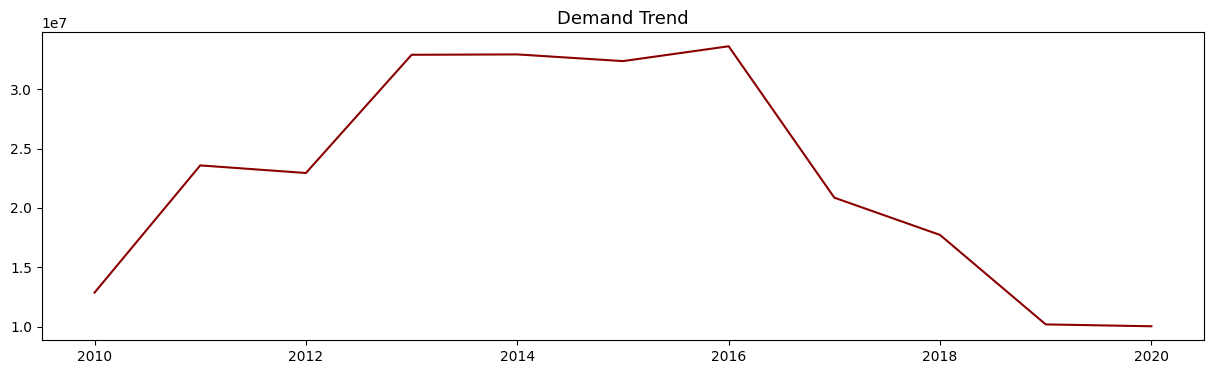

In [298]:
demand_trend= transaction.groupby('Year')['Units Sold'].sum().reset_index()
plt.figure(figsize=(15,4))
sns.lineplot(x='Year',y='Units Sold',data=demand_trend,color='#8B0000')
plt.title("Demand Trend",fontsize=13)
plt.xlabel("")
plt.ylabel("")  
plt.show()


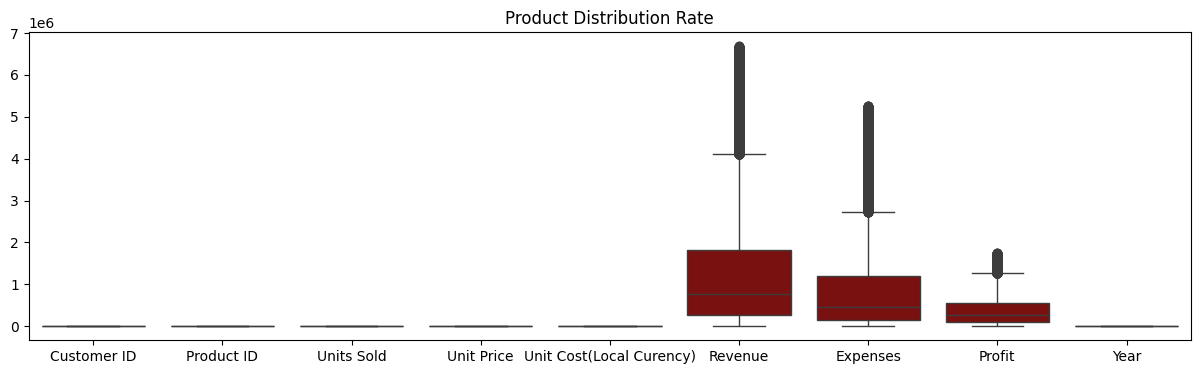

In [299]:
plt.figure(figsize=(15,4))
sns.boxplot(data=transaction,color='#8B0000')
plt.title("Product Distribution Rate")
plt.show()

 #### Feature Engineering

* Encoding Categorical Variables

In [300]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
transaction['Date']=le.fit_transform(transaction['Date'])
transaction['Item Group']=le.fit_transform(transaction['Item Group'])
transaction['Item Type']=le.fit_transform(transaction['Item Type'])
transaction['Month']=le.fit_transform(transaction['Month'])
transaction['Order Priority']=le.fit_transform(transaction['Order Priority'])
transaction['Sales Channel']=le.fit_transform(transaction['Sales Channel'])


In [301]:
transaction['Item Group'].unique()

array([1, 0])

In [302]:
transaction['Item Type'].unique()

array([ 4,  2,  1,  9,  7,  3,  6,  8, 10,  5,  0, 11])

In [303]:
transaction['Month'].unique()

array([11,  1,  0,  9,  2, 10,  5,  6,  7,  8,  3,  4])

In [304]:
transaction['Sales Channel'].unique()

array([1, 0])

In [305]:
transaction['Order Priority'].unique()

array([3, 1, 0, 2])

In [306]:
transaction.head(5)

,Customer ID,Date,Product ID,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost(Local Curency),Revenue,Expenses,Profit,Month,Year,Item Type,Item Group
0,1,3056,6,1,3,1975,205.70,117.11,406257.50,231292.25,174965.25,11,2018,4,1
1,2,3039,1,1,1,2542,421.89,364.69,1072444.38,927041.98,145402.40,1,2018,2,0
2,3,2895,8,1,0,5084,154.06,90.93,783241.04,462288.12,320952.92,0,2018,1,0
3,4,3123,5,1,2,9855,154.06,90.93,1518261.30,896115.15,622146.15,9,2018,9,1
4,5,3117,2,1,2,2831,651.21,524.96,1843575.51,1486161.76,357413.75,9,2018,7,0


In [307]:
transaction.tail(5)

,Customer ID,Date,Product ID,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost(Local Curency),Revenue,Expenses,Profit,Month,Year,Item Type,Item Group
49995,3090,2613,10,0,1,5796,47.45,31.79,275020.20,184254.84,90765.36,7,2017,3,1
49996,1745,2551,9,0,1,9909,81.73,56.67,809862.57,561543.03,248319.54,4,2017,10,0
49997,3479,2623,9,1,3,3378,47.45,31.79,160286.10,107386.62,52899.48,7,2017,10,0
49998,137,2713,3,0,1,3584,437.20,263.33,1566924.80,943774.72,623150.08,6,2017,11,0
49999,1245,2719,6,1,2,6848,668.27,502.54,4576312.96,3441393.92,1134919.04,6,2017,4,1


* Correlation Check

In [308]:
correlation_matrix=transaction.corrwith(transaction['Item Type'])
correlation_matrix

Customer ID                -0.002677
Date                       -0.005955
Product ID                 -0.162856
Sales Channel              -0.004868
Order Priority             -0.009124
Units Sold                 -0.001415
Unit Price                 -0.004021
Unit Cost(Local Curency)   -0.004489
Revenue                    -0.004305
Expenses                   -0.004863
Profit                     -0.001934
Month                      -0.003680
Year                       -0.005795
Item Type                   1.000000
Item Group                  0.123992
dtype: float64

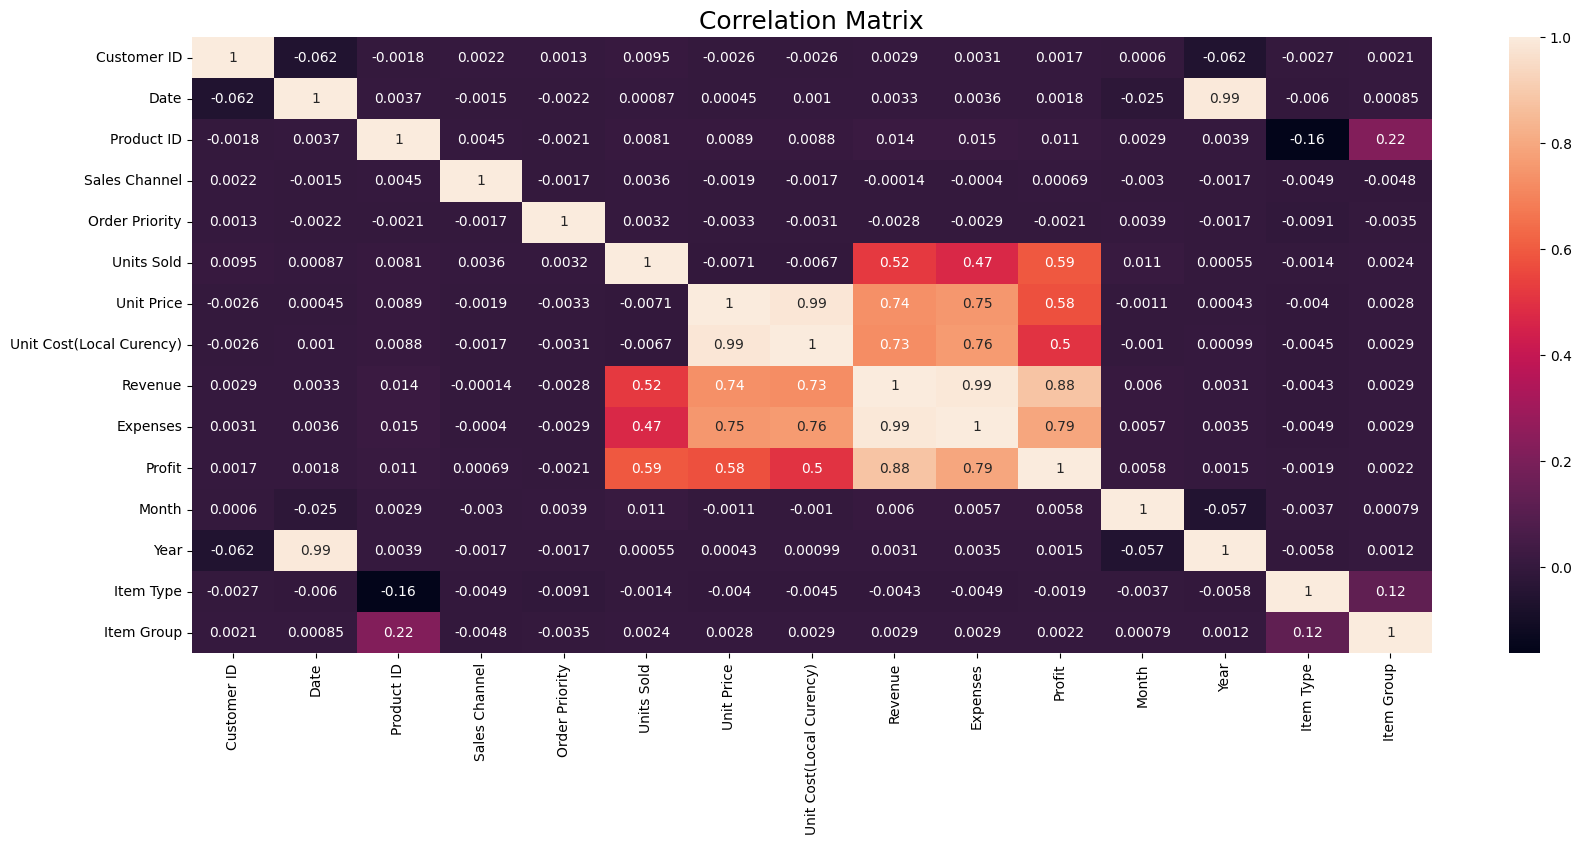

In [309]:
plt.figure(figsize=(20,8))
corr=transaction.corr()
sns.heatmap(corr,annot=True)
plt.title("Correlation Matrix",fontsize=18)
plt.show()

* Scaling Predictors

In [348]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
transaction[['Customer ID','Date','Product ID',
             'Sales Channel','Order Priority',
            'Units Sold','Unit Price',
            'Unit Cost(Local Curency)',
            'Revenue','Expenses','Month',
            'Year','Item Type','Item Group']]=sc.fit_transform(transaction[['Customer ID','Date',
                                                                           'Product ID','Sales Channel',
                                                                           'Order Priority','Units Sold',
                                                                           'Unit Price','Unit Cost(Local Curency)',
                                                                           'Revenue','Expenses','Month','Year',
                                                                           'Item Type', 'Item Group']])


In [349]:
transaction.head(5)

,Customer ID,Date,Product ID,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost(Local Curency),Revenue,Expenses,Profit,Month,Year,Item Type,Item Group
0,-1.724794,1.342660,-0.145767,0.998641,1.340549,-1.048647,-0.276382,-0.399892,-0.626732,-0.612696,174965.25,1.646708,1.308259,-0.429940,1.189289
1,-1.723930,1.324210,-1.589005,0.998641,-0.450001,-0.852066,0.720277,1.010187,-0.171648,-0.005338,145402.40,-1.296849,1.308259,-1.009554,-0.840838
2,-1.723066,1.167932,0.431528,0.998641,-1.345276,0.029255,-0.514448,-0.548998,-0.369208,-0.411047,320952.92,-1.591204,1.308259,-1.299361,-0.840838
3,-1.722202,1.415372,-0.434415,0.998641,0.445274,1.683379,-0.514448,-0.548998,0.132897,-0.032336,622146.15,1.057997,1.308259,1.019095,1.189289
4,-1.721338,1.408861,-1.300357,0.998641,0.445274,-0.751868,1.777468,1.922997,0.355125,0.482747,357413.75,1.057997,1.308259,0.439481,-0.840838


In [350]:
transaction.tail(5)

,Customer ID,Date,Product ID,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost(Local Curency),Revenue,Expenses,Profit,Month,Year,Item Type,Item Group
49995,0.944657,0.861888,1.008823,-1.001361,-0.450001,0.276108,-1.005932,-0.885827,-0.716383,-0.653757,90765.36,0.469285,0.926578,-0.719747,1.189289
49996,-0.217665,0.794602,0.720176,-1.001361,-0.450001,1.702101,-0.847898,-0.744124,-0.351023,-0.324402,248319.54,-0.413782,0.926578,1.308902,-0.840838
49997,1.280823,0.872741,0.720176,0.998641,1.340549,-0.562222,-1.005932,-0.885827,-0.794760,-0.720860,52899.48,0.469285,0.926578,1.308902,-0.840838
49998,-1.607266,0.970414,-1.011710,-1.001361,-0.450001,-0.490801,0.790858,0.432897,0.166140,0.009268,623150.08,0.174930,0.926578,1.598709,-0.840838
49999,-0.649755,0.976926,-0.145767,0.998641,0.445274,0.640841,1.856116,1.795305,2.221907,2.189574,1134919.04,0.174930,0.926578,-0.429940,1.189289


* Collinearity Check

In [351]:
correlation=transaction.corrwith(transaction['Profit'])
print(correlation)

Customer ID                 0.001692
Date                        0.001805
Product ID                  0.011108
Sales Channel               0.000690
Order Priority             -0.002075
Units Sold                  0.593283
Unit Price                  0.575675
Unit Cost(Local Curency)    0.502958
Revenue                     0.880111
Expenses                    0.794928
Profit                      1.000000
Month                       0.005775
Year                        0.001544
Item Type                  -0.001934
Item Group                  0.002232
dtype: float64


* Feature Selection

In [352]:
sc_x= transaction.drop(columns=['Customer ID','Profit'],axis=1)
sc_y=transaction['Profit']

* Splitting and Training data

In [353]:
from sklearn.model_selection import train_test_split
sc_x_train,sc_x_test,sc_y_train,sc_y_test=train_test_split(sc_x,sc_y,test_size=0.2,random_state=42)

#### Model Selection

* Linear Regression

In [354]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
le=LinearRegression()
le.fit(sc_x_train,sc_y_train)


LinearRegression()

* Model Evaluation

In [355]:
le_prediction=le.predict(sc_x_test)
le_score=le.score(sc_x_test,sc_y_test)
le_mse=mean_squared_error(sc_y_test,le_prediction)
le_rmse= np.sqrt(le_mse)
le_mae= mean_absolute_error(sc_y_test,le_prediction)
le_r2= r2_score(sc_y_test,le_prediction)
print("Model Score:",le_score)
print("MSE:",le_mse)
print("RMSE:",le_rmse)
print("MAE:",le_mae)
print("R-squared:",le_r2)

Model Score: 1.0
MSE: 1.2450625876428322e-18
RMSE: 1.1158237260619762e-09
MAE: 8.989435926309852e-10
R-squared: 1.0


* Ridge

In [356]:
from sklearn.linear_model import Ridge
rd=Ridge()
rd.fit(sc_x_train,sc_y_train)

Ridge()

* Model Evaluation

In [358]:
rd_prediction=rd.predict(sc_x_test)
rd_score=rd.score(sc_x_test,sc_y_test)
rd_mse=mean_squared_error(sc_y_test,rd_prediction)
rd_rmse= np.sqrt(rd_mse)
rd_mae= mean_absolute_error(sc_y_test,rd_prediction)
rd_r2= r2_score(sc_y_test,rd_prediction)
print("Model Score:",rd_score)
print("MSE:",rd_mse)
print("RMSE:",rd_rmse)
print("MAE:",rd_mae)
print("R-squared:",rd_r2)

Model Score: 0.9999942345851552
MSE: 828922.5453564215
RMSE: 910.4518358246204
MAE: 645.7183565419493
R-squared: 0.9999942345851552


* Gradient Boosting

In [359]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(sc_x_train,sc_y_train)

GradientBoostingRegressor()

* Model Evaluation

In [360]:
gb_prediction=gb.predict(sc_x_test)
gb_model_score=gb.score(sc_x_test,sc_y_test)
gb_mse=mean_squared_error(sc_y_test,gb_prediction)
gb_rmse= np.sqrt(gb_mse)
gb_mae= mean_absolute_error(sc_y_test,gb_prediction)
gb_r2= r2_score(sc_y_test,gb_prediction)
print("Model Score:",gb_model_score)
print("MSE:",gb_mse)
print("RMSE:",gb_rmse)
print("MAE:",gb_mae)
print("R-squared:",gb_r2)

Model Score: 0.9985409135399324
MSE: 209780162.39050543
RMSE: 14483.789641889496
MAE: 10369.916700008924
R-squared: 0.9985409135399324


* Random Forest

In [361]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(sc_x_test,sc_y_test)

RandomForestRegressor()

* Model Evaluation

In [362]:
rf_prediction=gb.predict(sc_x_test)
rf_model_score=gb.score(sc_x_test,sc_y_test)
rf_mse=mean_squared_error(sc_y_test,rf_prediction)
rf_rmse= np.sqrt(rf_mse)
rf_mae= mean_absolute_error(sc_y_test,rf_prediction)
rf_r2= r2_score(sc_y_test,rf_prediction)
print("Model Score:",rf_model_score)
print("MSE:",rf_mse)
print("RMSE:",rf_rmse)
print("MAE:",rf_mae)
print("R-squared:",rf_r2)

Model Score: 0.9985409135399324
MSE: 209780162.39050543
RMSE: 14483.789641889496
MAE: 10369.916700008924
R-squared: 0.9985409135399324


* Decsion Trees

In [363]:
from sklearn.tree import DecisionTreeRegressor
dc=DecisionTreeRegressor()
dc.fit(sc_x_train,sc_y_train)

DecisionTreeRegressor()

* Model Evaluation

In [364]:
dc_prediction=dc.predict(sc_x_test)
dc_model_score=gb.score(sc_x_test,sc_y_test)
dc_mse=mean_squared_error(sc_y_test,dc_prediction)
dc_rmse= np.sqrt(dc_mse)
dc_mae= mean_absolute_error(sc_y_test,dc_prediction)
dc_r2= r2_score(sc_y_test,dc_prediction)
print("Model Score:",dc_model_score)
print("MSE:",dc_mse)
print("RMSE:",dc_rmse)
print("MAE:",dc_mae)
print("R-squared:",dc_r2)

Model Score: 0.9985409135399324
MSE: 2268913.459844899
RMSE: 1506.2912931584312
MAE: 256.5303239999991
R-squared: 0.9999842189992104


### Model Accuracy Comparison

In [374]:
model_scores=pd.DataFrame({
    'Model': ['LinearRegression','Ridge','Gradient Boosting',
              'Random Forest','Decision Trees'],
    'Score': [100*round(le_score,4),100*round(rd_score,4),
              100*round(gb_model_score,4),100*round(rf_model_score,4),
              100*round(dc_model_score,4)],
    'MAE':   [round(le_mae,4),round(rd_mae,4),round(gb_mae,4),
              round(rf_mae,4),round(dc_mae,4)],                                        
    'RMSE': [round(le_rmse,4),round(rd_rmse,4),round(gb_rmse,4),
             round(rf_rmse,4),round(dc_rmse,4)],
    'R-squared Score': [100*round(le_r2,4),100*round(rd_r2,4),100*round(gb_r2,4),
                      100*round(rf_r2,4),100*round(dc_r2,4)]
    
})
model_scores.sort_values(by='Score',ascending=False)

,Model,Score,MAE,RMSE,R-squared Score
0,LinearRegression,100.00,0.0000,0.0000,100.00
1,Ridge,100.00,645.7184,910.4518,100.00
2,Gradient Boosting,99.85,10369.9167,14483.7896,99.85
3,Random Forest,99.85,10369.9167,14483.7896,99.85
4,Decision Trees,99.85,256.5303,1506.2913,100.00


#### Model Prediction

implementing Linear Regression for Prediction

In [389]:
data= pd.DataFrame({'Date': [0.976926],'Product ID':[-0.145767],'Sales Channel':[0.998641],
                    'Order Priority': [0.445274],'Units Sold':[0.640841],'Unit Price':[1.856116],
                    'Unit Cost(Local Curency)': [1.795305],'Revenue': [2.221907],'Expenses': [2.189574],
                    'Month': [0.174930],'Year': [0.926578],'Item Type': [0.429940],'Item Group':[1.189289]
                          })
output=le.predict(data)
print("Prediction:",output)
if output>=1134919.04:
    print("Trusted Prediction")
else:
    print("Error")

Prediction: [1134919.39206518]
Trusted Prediction


#### Recommendation & Conclusion

By effectively combing data from multiple sources,preprocessing the data and employing advanced machine learning techniques, we developed a robust model (Linear Regression Model) to predict product profitability.The selected model can procide valuable insights to optimize inventory management,pricing strategies, and marketing campaigns.

Project done by: Jones Osele

email: oselejones@gmail.com